<a href="https://colab.research.google.com/github/sujithshetty15/ServoMechanism/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title of the project:
Servo Prediction


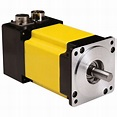

Objectives:The process of controlling various operating equipment, machinery, etc., automatically can be termed as automation. This is an efficient method to use in every field to reduce manpower, energy usage, and also for improving the quality, accuracy, precision, and efficiency of any system. The home automation system helps in automating various aspects of life. The invention of advanced technologies and computing methodology helps in automating various activities in the home, often termed as a smart home.

Import library

In [1]:
import pandas as pd
import numpy as np

Import Data

In [2]:
servo=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

In [3]:
servo.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [4]:
servo.tail()

,Motor,Screw,Pgain,Vgain,Class
162,B,C,3,2,44
163,B,E,3,1,40
164,C,D,4,3,25
165,A,B,3,2,44
166,A,A,6,5,20


In [5]:
servo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


Describe data

In [6]:
servo.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


Data Visualization

In [8]:
servo.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [9]:
servo.shape

(167, 5)

Data Preprocessing

In [10]:
servo[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [11]:
servo[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

In [12]:
servo.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [13]:
servo.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

Define Target Variable (y) and Feature Variables (X)

In [14]:
y=servo['Class']

In [15]:
y.shape

(167,)

In [16]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [17]:
X=servo[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [18]:
X.shape

(167, 4)

In [19]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2529)

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

Modeling

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model=LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression()

Prediction

In [26]:
y_pred=model.predict(X_test)

In [27]:
y_pred.shape

(51,)

In [28]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

Model Evaluation

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [30]:
mean_squared_error(y_test,y_pred)

66.03589175595563

In [31]:
mean_absolute_error(y_test,y_pred)

7.190539677251235

In [32]:
r2_score(y_test,y_pred)

0.6807245170563927

Visualization

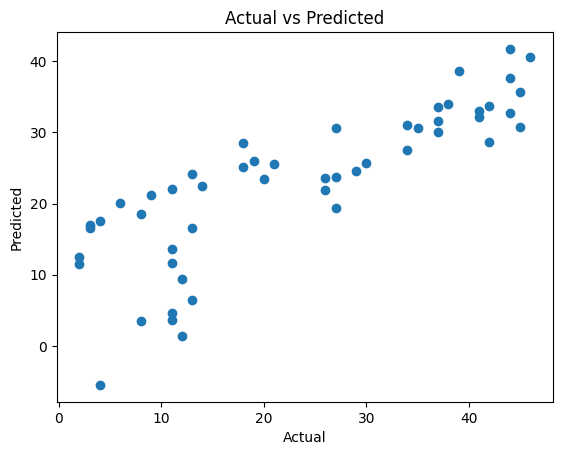

In [33]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

Future predictions

In [44]:
X_new=servo.sample(1)

In [45]:
X_new

,Motor,Screw,Pgain,Vgain,Class
165,0,1,3,2,44


In [46]:
X_new.shape

(1, 5)

In [47]:
X_new=X_new.drop('Class',axis=1)

In [48]:
X_new

,Motor,Screw,Pgain,Vgain
165,0,1,3,2


In [49]:
X_new.shape

(1, 4)

In [50]:
y_pred_new=model.predict(X_new)

In [51]:
y_pred_new

array([41.7009556])

Explanation


This gives the details with data set involving the simulation of servo system involving a servo amplier,a motor, a lead screw and a sliding carriage of some sort